### K-Means Clustering Algorithm


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

In [4]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [ ]:
# we are not going to use y as we are doing unsupervised learning
X

array([[-1.4624635 ,  1.55265158],
       [-1.44710722,  1.57608036],
       [-9.37363834,  8.96797692],
       ...,
       [ 6.77666911,  5.00909166],
       [ 6.02069001,  1.60327349],
       [-8.34586987,  9.73097024]])

<class 'numpy.ndarray'>


Text(0, 0.5, 'Feature 2')

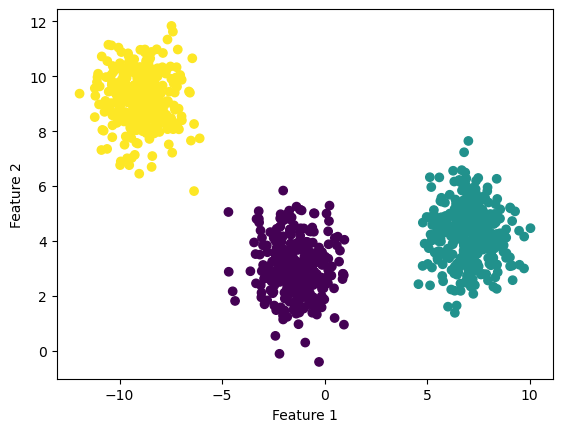

In [7]:
# lets see our datapoints
print(type(X[:,0]))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


In [9]:
# standardization 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=32)

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled = scaler.transform(X_test)

'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is "greedy k-means++". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

In [14]:
import os
os.environ["OMP_NUM_THREADS"] = "3"


In [15]:
from sklearn.cluster import KMeans 

### Elbow method to find the K-value

# within cluster sum of squares
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

print(wcss)

[1339.9999999999989, 293.49004309036917, 96.77902475180426, 79.74752804772996, 62.65272651850811, 45.56404356176339, 40.41249730787343, 35.869206145689255, 33.13495827754374, 29.574370648240563]


c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

Text(0.5, 0, 'Within Cluster Sum of Square')

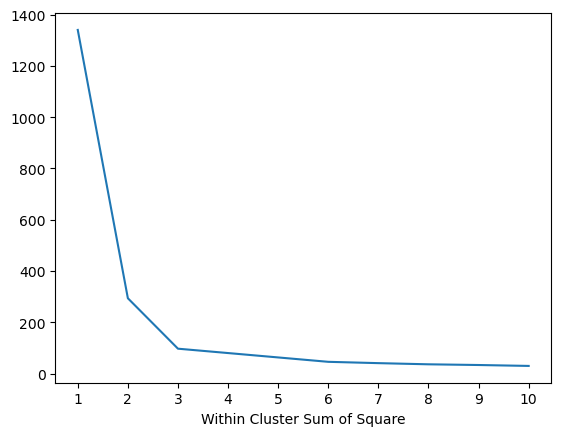

In [ ]:
### Plot the elbow curve 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("K-Clusters")
plt.xlabel("Within Cluster Sum of Square")

In [17]:
### So we find elbow point at K=3 
kmeans = KMeans(n_clusters=3,init='k-means++')

In [19]:
y_pred_test = kmeans.fit_predict(X_test_scaled)

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Test feature_2')

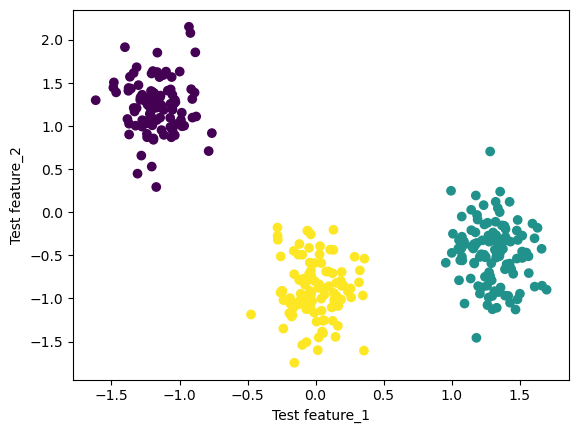

In [21]:
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=y_pred_test)
plt.xlabel("Test feature_1")
plt.ylabel("Test feature_2")

### Validating the K-value

1) kneeLocator
2) Silhoutee Scoring

In [22]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [23]:
from kneed import KneeLocator 

kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

3

In [ ]:
# Silhoutte scoring
from sklearn.metrics import silhouette_score 

silhoutte_coeff = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    silhoutte_coeff.append(score)

silhoutte_coeff

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

[0.7091472313958429,
 0.7171715734650052,
 0.6220634877821379,
 0.5561496177888957,
 0.43187134091827095,
 0.4078514882426078,
 0.40344780110096473,
 0.382491274168062,
 0.37972278506862095]

Text(0, 0.5, 'Silhoutte Coefficient')

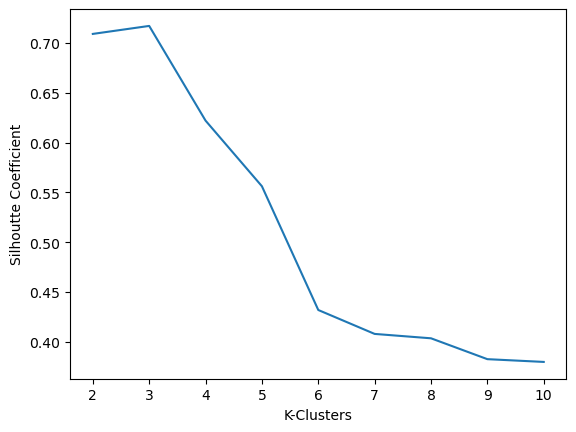

In [26]:
plt.plot(range(2,11),silhoutte_coeff)
plt.xlabel("K-Clusters")
plt.ylabel("Silhoutte Coefficient")

In [27]:
### so it peaks at 3